In [1]:
!pip install numpy matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


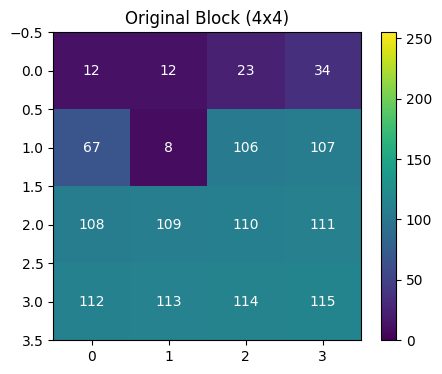

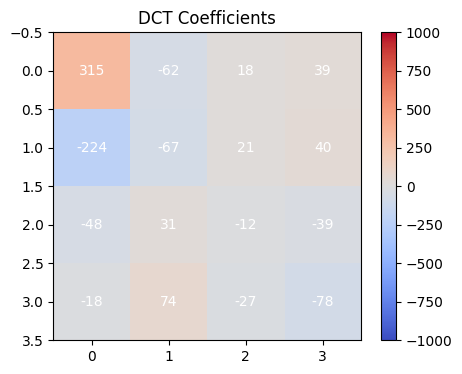

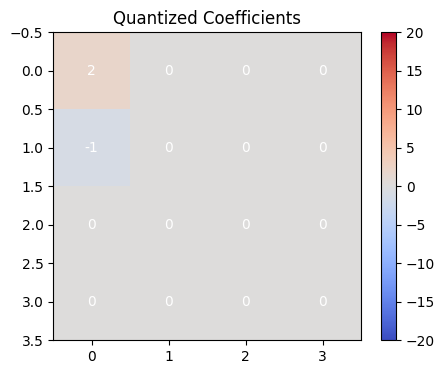

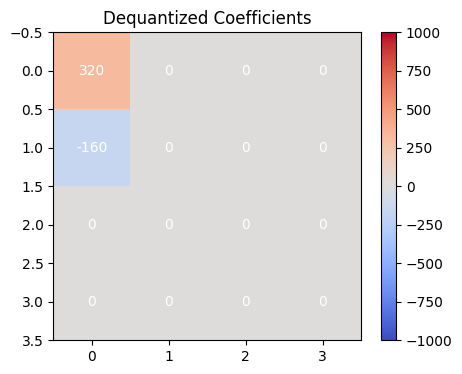

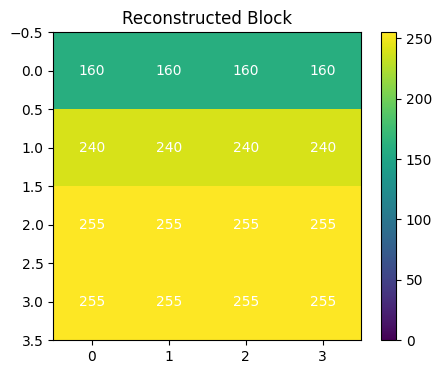

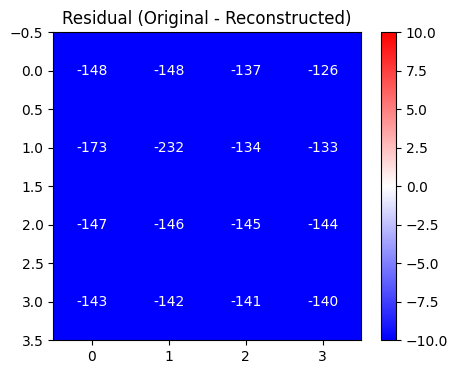

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ========================================================
# 核心函数定义
# ========================================================

def dct4x4(block):
    """ H.264 4x4 整数 DCT 变换 """
    H = np.array([[1, 1, 1, 1], [2, 1, -1, -2], [1, -1, -1, 1], [1, -2, 2, -1]], dtype=np.int32)
    coeff = H @ block @ H.T
    coeff = (coeff + 2) // 4  # 右移 2 位（整数运算）
    return coeff

def idct4x4(coeff):
    """ H.264 4x4 整数逆 DCT 变换 """
    H_inv = np.array([[1, 1, 1, 1], [1, 0.5, -0.5, -1], [1, -1, -1, 1], [0.5, -1, 1, -0.5]], dtype=np.float32)
    block = H_inv.T @ coeff @ H_inv
    block = np.round(block).astype(np.int32)
    return np.clip(block, 0, 255)

def quantize(coeff, QP):
    """ 量化 """
    Qstep = 0.625 * (2 ** (QP // 6))  # 基础量化步长
    quant_coeff = np.round(coeff / (Qstep * 16)).astype(np.int32)
    return quant_coeff

def dequantize(quant_coeff, QP):
    """ 反量化 """
    Qstep = 0.625 * (2 ** (QP // 6))
    dequant_coeff = quant_coeff * Qstep * 16
    return dequant_coeff.astype(np.int32)

# ========================================================
# 可视化函数
# ========================================================

def plot_matrix(data, title, cmap='viridis', vmin=None, vmax=None):
    """ 绘制矩阵热力图 """
    plt.figure(figsize=(5, 4))
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.title(title)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(j, i, f"{data[i, j]}", ha='center', va='center', color='w')
    plt.show()

# ========================================================
# 完整流程演示
# ========================================================

# 1. 定义原始像素块（4x4）
original_block = np.array([
    [12, 12, 23, 34],
    [67, 8, 106, 107],
    [108, 109, 110, 111],
    [112, 113, 114, 115]
], dtype=np.int32)

QP = 24  # 量化参数

# 2. 可视化原始块
plot_matrix(original_block, "Original Block (4x4)", vmin=0, vmax=255)

# 3. 正向 DCT 变换
coeff = dct4x4(original_block)
plot_matrix(coeff, "DCT Coefficients", cmap='coolwarm', vmin=-1000, vmax=1000)

# 4. 量化
quant_coeff = quantize(coeff, QP)
plot_matrix(quant_coeff, "Quantized Coefficients", cmap='coolwarm', vmin=-20, vmax=20)

# 5. 反量化
dequant_coeff = dequantize(quant_coeff, QP)
plot_matrix(dequant_coeff, "Dequantized Coefficients", cmap='coolwarm', vmin=-1000, vmax=1000)

# 6. 逆 DCT 变换
reconstructed_block = idct4x4(dequant_coeff)
plot_matrix(reconstructed_block, "Reconstructed Block", vmin=0, vmax=255)

# 7. 残差计算
residual = original_block - reconstructed_block
plot_matrix(residual, "Residual (Original - Reconstructed)", cmap='bwr', vmin=-10, vmax=10)